<a href="https://colab.research.google.com/github/chloepalin/chloepalin.github.io/blob/master/animalClass2Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q2: Animal Classifier 

---



## Introduction
In the field of machine learning, accurately classifying multiple classes is a fundamental task that can be used for mutliple applications. This task involves the selection of an appropriate multiclass loss function, which aids in quantifying the discrepancy between predicted and true class labels. This introductory analysis question aims to describe the use of a suitable loss function for classifying ten animal pictures, using the source code provided from the "00-is-it-a-bird-creating-a-model-from-your-own-data.ipynb" notebook (Howard, J., 2023). Furthermore, the analysis will interpreted using t-SNE and confusion matrices to assess the performance of the trained classification model. 

The dataset used comprises of ten distinct animal categories, each represented by multiple images sourced from a DuckDuckGo search. The goal is to train a model that can accurately predict the correct class label when presented with new animal pictures. To achieve this, a multiclass loss function needs to be carefully selected in order to optimise the model's learning process and enhance its ability to differentiate between different animals.

## Downloading animal images

---



Firstly, install fasbook/DuckDuckGo search engine to gather a rich assortment of animal images which cover various species, habitats, behaviours, and other relevant aspects for image classification.

In [ ]:
# Skip this cell if you already have duckduckgo_search installed
!pip install fastbook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 114.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━

An image search was initiated to obtain a lion photo in order to examine the resulting outcome. Several URLs were gathered as part of the search process. The first URL was downloaded and the image was viewed to ensure the search worked as expected.

In [ ]:
from fastbook import search_images_ddg
urls = search_images_ddg('lion photos', max_images=1)
urls[0]

'https://wallpapertag.com/wallpaper/full/8/2/f/744667-male-lion-faces-wallpaper-2048x1423-for-meizu.jpg'

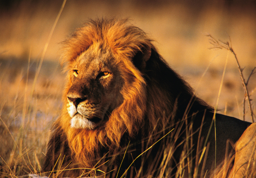

In [ ]:
from fastdownload import download_url
dest = 'lion.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Next, a search was done for the remaining 10 animals to ensure that the image data gathered is valid.

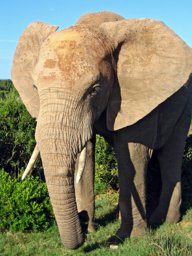

In [ ]:
download_url(search_images_ddg('elephant photos', max_images=1)[0], 'elephant.jpg', show_progress=False)
Image.open('elephant.jpg').to_thumb(256,256)

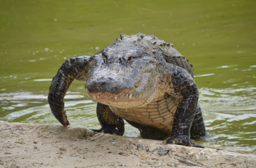

In [ ]:
download_url(search_images_ddg('crocodile photos', max_images=1)[0], 'crocodile.jpg', show_progress=False)
Image.open('crocodile.jpg').to_thumb(256,256)

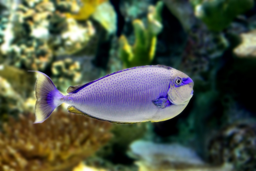

In [ ]:
download_url(search_images_ddg('fish photos', max_images=1)[0], 'fish.jpg', show_progress=False)
Image.open('fish.jpg').to_thumb(256,256)

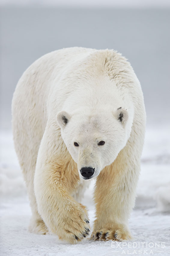

In [ ]:
download_url(search_images_ddg('polar bear photos', max_images=1)[0], 'polarbear.jpg', show_progress=False)
Image.open('polarbear.jpg').to_thumb(256,256)

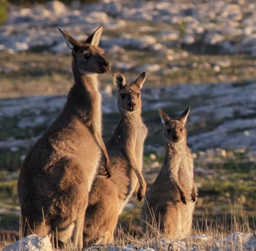

In [ ]:
download_url(search_images_ddg('kangaroo photos', max_images=1)[0], 'kangaroo.jpg', show_progress=False)
Image.open('kangaroo.jpg').to_thumb(256,256)

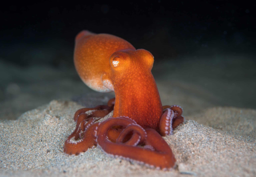

In [ ]:
download_url(search_images_ddg('octopus photos', max_images=1)[0], 'octopus.jpg', show_progress=False)
Image.open('octopus.jpg').to_thumb(256,256)

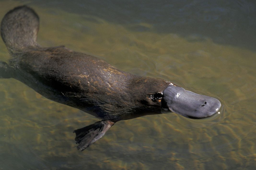

In [ ]:
download_url(search_images_ddg('platypus photos', max_images=1)[0], 'platypus.jpg', show_progress=False)
Image.open('platypus.jpg').to_thumb(256,256)

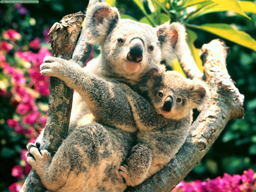

In [ ]:
download_url(search_images_ddg('koala photos', max_images=1)[0], 'koala.jpg', show_progress=False)
Image.open('koala.jpg').to_thumb(256,256)

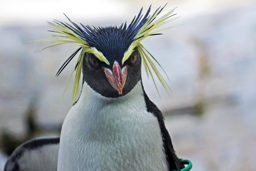

In [ ]:
download_url(search_images_ddg('penguin photos', max_images=1)[0], 'penguin.jpg', show_progress=False)
Image.open('penguin.jpg').to_thumb(256,256)

As the searches each provided reasonable results, multiple images for each animal class were collected and saved to the 'animal_classifier' local folder. The download_images() function was used to download images related to the currently searched animal. It takes the destination directory and the URLs obtained from search_images_ddg() as arguments. search_images_ddg() searches for images using the animal's name followed by the term "animal" as the search query to help obtain only animal-specific images.

In [ ]:
from fastbook import search_images_ddg

searches = 'lion','elephant', 'crocodile', 'fish', 'polar bear', 'kangaroo', 'octopus', 'platypus', 'koala', 'penguin'
path = Path('animal_classifier')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images_ddg(f'{o} animal'))
    sleep(10)  # Pause between searches to avoid over-loading server
    resize_images(path/o, max_size=400, dest=path/o)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:2918: DecompressionBombWarning: Image size (95860800 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In case some images were not correctly downloaded, the images were removed from the library. The removal process reduces the risk of model training failure. 

In [ ]:
#from pathlib import Path
from fastai.vision.all import *

path = Path('animal_classifier')

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)


57

##Model training: Part 1

---



To facilitate model training, `
DataLoaders
` are essential as they encompass both the training set (used for model formation) and the validation set (used to assess the model's accuracy, but is not used when training the model). In the 
`
fastai
` library, the creation of DataLoaders is a streamlined process based on `
DataBlocks (fastai, n.d.).
` 

`DataLoaders 
`contain the necessary data transformations and configurations that are required for accurate model training. `DataBlocks
` provide a flexible and intuitive interface to assemble the training and validation datasets, image resizing, data augmentation techniques, and batch size alteration. Fast.ai's simplified data preparation phase for model training and evaluation thereby provides a preliminary interpretation of the data and verify the effectiveness of the data preprocessing steps (fastai, n.d.). The ability to visualise the sample images aids in ensuring the data is correctly loaded, processed, and ready for model training.



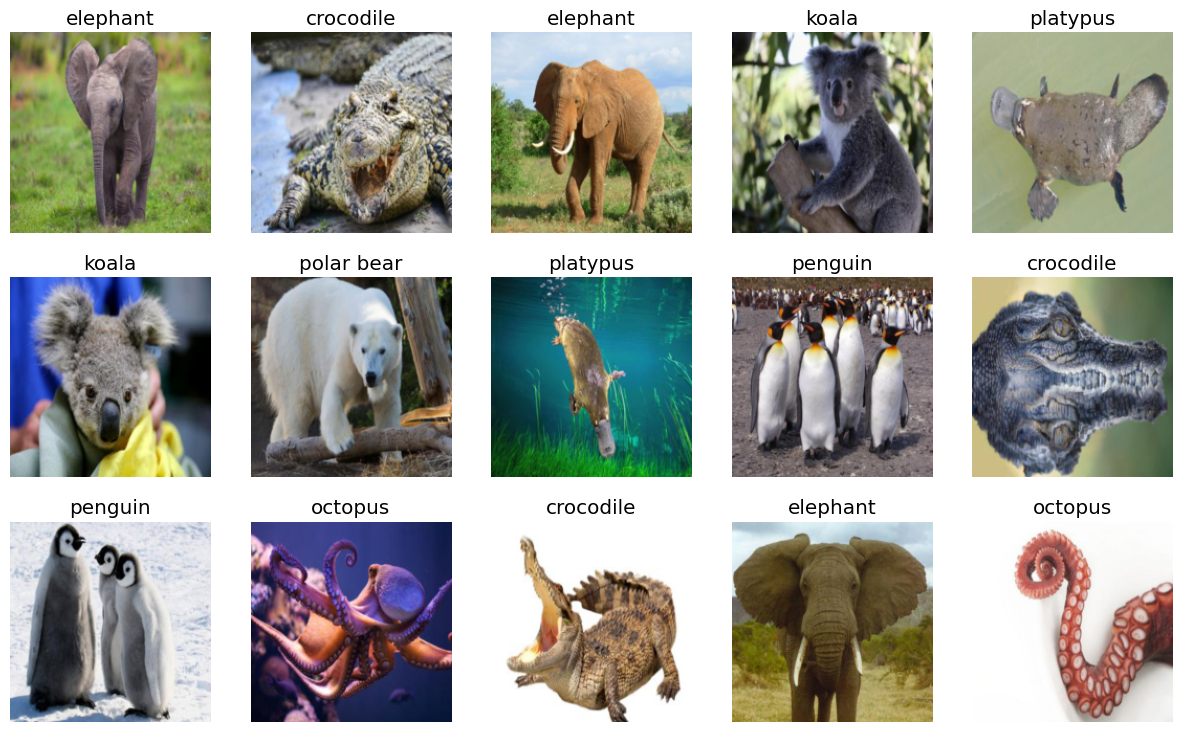

In [ ]:
dls = DataBlock(
    # Model inputs are animal images, outputs are animal categories
    blocks=(ImageBlock, CategoryBlock), 
    # Locating all of the inputs to the model
    get_items=get_image_files, 
    # Split the data into training and validation sets randomly
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    # The labels are the name of the parent of each file
    get_y=parent_label,
    # 'Squish' image to 192x192 pixels before training (opposed to cropping)
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=15)

To commence model training, a vision learner object (learn) is created using `vision_learner()`. This function instantiates the learner and involves three key parameters. Firstly, the `dls` argument represents the `DataLoaders` object containing meticulously prepared training and validation datasets. Secondly, `resnet18` denotes the specific architecture chosen for the model, in this case, ResNet18. Lastly, the `metrics=error_rate` parameter indicates the evaluation metric employed to measure model performance.

By invoking the `fine_tune()` method on the learn object, the model undergoes targeted refinements. In the `fast.ai` library, `fine_tune()` simplifies the process of fine-tuning a pre-trained model by incorporating best practices. It follows a two-step approach to maximize the model's potential (Howard, J., 2023). Firstly, the body layers of the model are frozen, ensuring that solely the newly introduced and randomly initialised layers are trained for a limited number of epochs (in this case, 3). This strategic approach enables the model to learn task-specific features while retaining the valuable pre-trained knowledge residing in the initial layers (Howard, J., 2023). 

Following this initial phase, the entire model, including the body layers, is unfrozen, enabling comprehensive fine-tuning. All the layers then collaboratively refine their respective parameters throughout the specified number of epochs. This training approach further enhances the model's capacity to effectively classify to unseen data, improving its overall performance.

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.606509,0.234429,0.071429,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.182068,0.182885,0.049451,00:11
1,0.118045,0.145696,0.049451,00:08
2,0.070190,0.124792,0.049451,00:12


## Using the animal classifing model

---



Before applying a larger testing dataset to the model, the following code snippet shows the model being tested using the animal images that were firstly downloaded for image search validation. It is tested by predicting the class labels and probabilites for the different animal images. This code snippet is adapted from the source code.





In [ ]:
is_lion,_,probs = learn.predict(PILImage.create('lion.jpg'))
is_elephant,_,probs = learn.predict(PILImage.create('elephant.jpg'))
is_polar_bear,_,probs = learn.predict(PILImage.create('polarbear.jpg'))
is_penguin,_,probs = learn.predict(PILImage.create('penguin.jpg'))
is_kangaroo,_,probs = learn.predict(PILImage.create('kangaroo.jpg'))
is_koala,_,probs = learn.predict(PILImage.create('koala.jpg'))
is_octopus,_,probs = learn.predict(PILImage.create('octopus.jpg'))
is_platypus,_,probs = learn.predict(PILImage.create('platypus.jpg'))
is_fish,_,probs = learn.predict(PILImage.create('fish.jpg'))
is_crocodile,_,probs = learn.predict(PILImage.create('crocodile.jpg'))

print(f"This is a: {is_lion}.")
print(f"Probability it's a lion: {probs[0]:.4f}")
print(f"This is a: {is_elephant}.")
print(f"Probability it's a elephant: {probs[0]:.4f}")
print(f"This is a: {is_polar_bear}.")
print(f"Probability it's a polar bear: {probs[0]:.4f}")
print(f"This is a: {is_penguin}.")
print(f"Probability it's a penguin: {probs[0]:.4f}")
print(f"This is a: {is_kangaroo}.")
print(f"Probability it's a kangaroo: {probs[0]:.4f}")
print(f"This is a: {is_koala}.")
print(f"Probability it's a koala: {probs[0]:.4f}")
print(f"This is a: {is_octopus}.")
print(f"Probability it's a octopus: {probs[0]:.4f}")
print(f"This is a: {is_platypus}.")
print(f"Probability it's a platypus: {probs[0]:.4f}")
print(f"This is a: {is_fish}.")
print(f"Probability it's a fish: {probs[0]:.4f}")
print(f"This is a: {is_crocodile}.")
print(f"Probability it's a crocodile: {probs[0]:.4f}")

This is a: lion.
Probability it's a lion: 0.9999
This is a: elephant.
Probability it's a elephant: 0.9999
This is a: polar bear.
Probability it's a polar bear: 0.9999
This is a: penguin.
Probability it's a penguin: 0.9999
This is a: kangaroo.
Probability it's a kangaroo: 0.9999
This is a: koala.
Probability it's a koala: 0.9999
This is a: octopus.
Probability it's a octopus: 0.9999
This is a: platypus.
Probability it's a platypus: 0.9999
This is a: fish.
Probability it's a fish: 0.9999
This is a: crocodile.
Probability it's a crocodile: 0.9999


As such, ResNet-18, the chosen multiclass loss function for this model, has demonstrated its effectiveness in accurately predicting the different animal classes. 

ResNet-18 is pretrained on a large dataset, such as ImageNet, which contains millions of images from thousands of categories. This pretraining process involves training the model on a vast amount of diverse visual data, allowing it to learn general visual representations and extract meaningful features from images (fastai, n.d.).

Furthermore, ResNet-18's deep layers and convolutional operations ensures that the model can learns to extract important visual cues, such as shape, texture, patterns, and colour (fastai, n.d.) - all indicative of particular animals. Therefore, through a series of convolutional and pooling operations, ResNet-18 can capture and abstract these distinguishing features, allowing for accurate classification of animal images.